In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# loading the data from csv file to a Pandas DataFrame
dataset = pd.read_csv('train_BRCpofr.csv')

In [3]:
dataset.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [4]:
dataset.shape

(89392, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [6]:
dataset.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [7]:
dataset.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

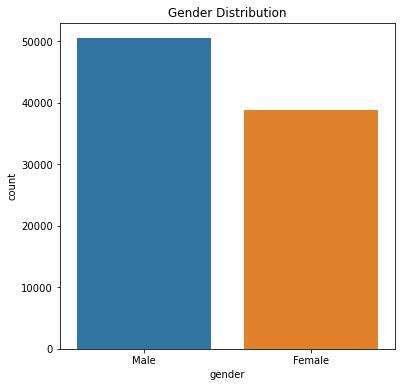

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='gender', data=dataset)
plt.title('Gender Distribution')
plt.show()

In [10]:
dataset['gender'].value_counts()

Male      50497
Female    38895
Name: gender, dtype: int64

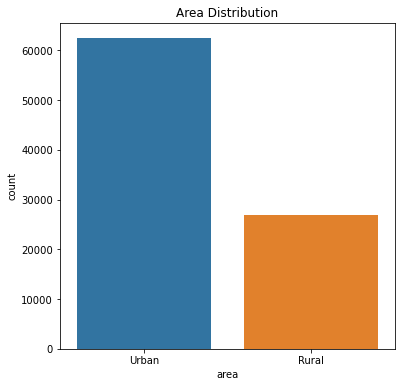

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='area', data=dataset)
plt.title('Area Distribution')
plt.show()

In [12]:
dataset['area'].value_counts()

Urban    62455
Rural    26937
Name: area, dtype: int64

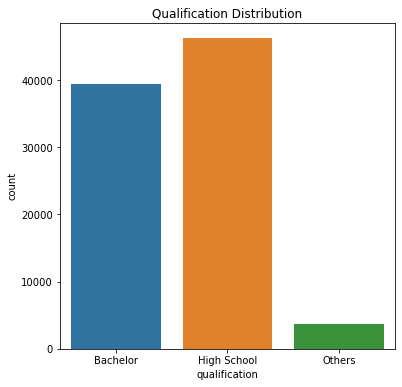

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='qualification', data=dataset)
plt.title('Qualification Distribution')
plt.show()

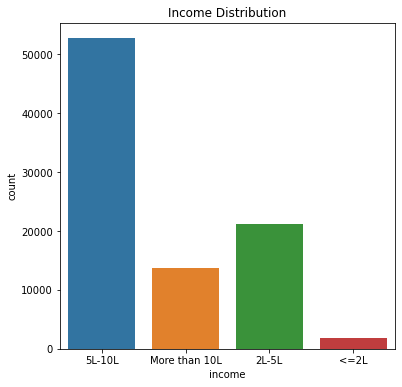

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='income', data=dataset)
plt.title('Income Distribution')
plt.show()

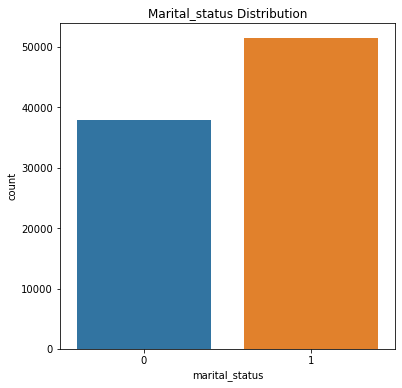

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='marital_status', data=dataset)
plt.title('Marital_status Distribution')
plt.show()

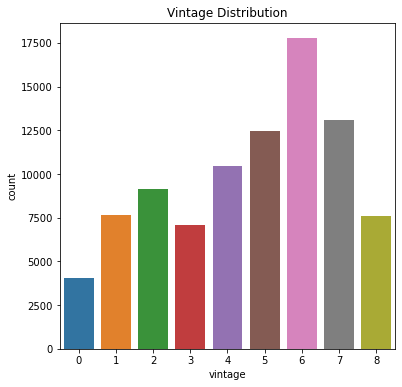

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='vintage', data=dataset)
plt.title('Vintage Distribution')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


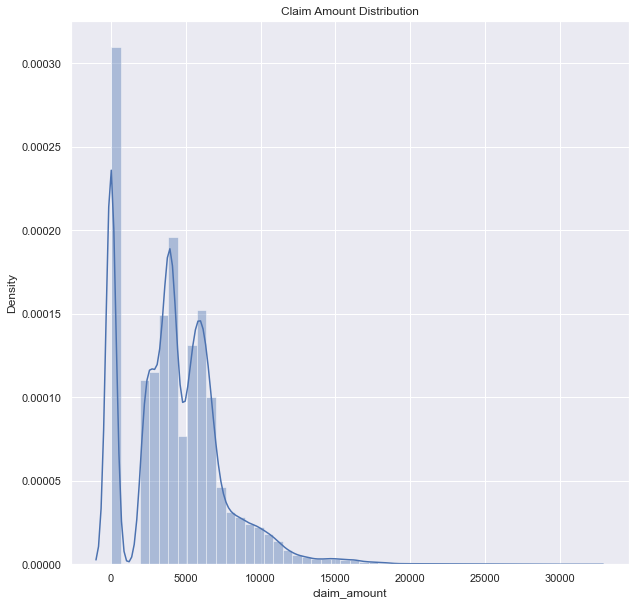

In [17]:
sns.set()
plt.figure(figsize=(10,10))
sns.distplot(dataset['claim_amount'])
plt.title('Claim Amount Distribution')
plt.show()

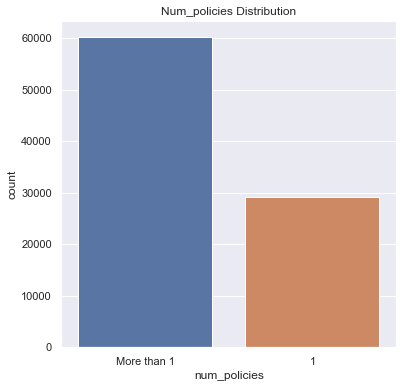

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='num_policies', data=dataset)
plt.title('Num_policies Distribution')
plt.show()

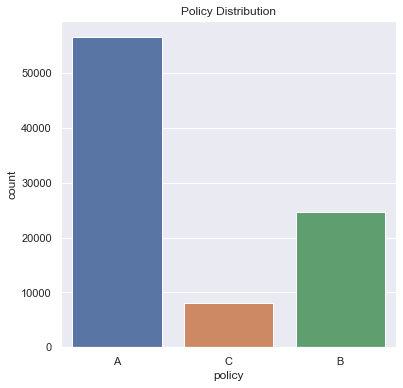

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='policy', data=dataset)
plt.title('Policy Distribution')
plt.show()

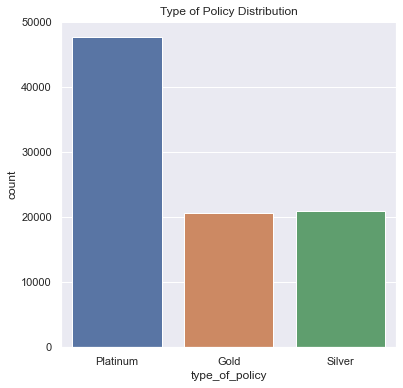

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='type_of_policy', data=dataset)
plt.title('Type of Policy Distribution')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


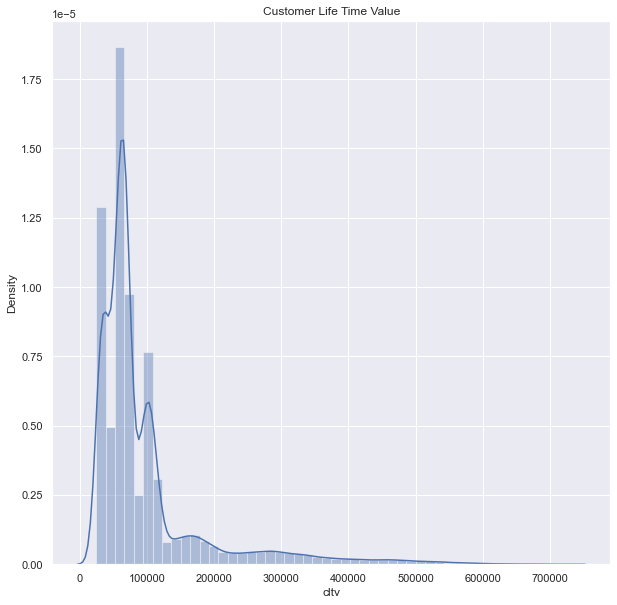

In [21]:
sns.set()
plt.figure(figsize=(10,10))
sns.distplot(dataset['cltv'])
plt.title('Customer Life Time Value')
plt.show()

In [22]:
dataset['gender']= label_encoder.fit_transform(dataset['gender'])
dataset['area'] = label_encoder.fit_transform(dataset['area'])
dataset['qualification'] = label_encoder.fit_transform(dataset['qualification'])
dataset['income']= label_encoder.fit_transform(dataset['income'])
dataset['num_policies'] = label_encoder.fit_transform(dataset['num_policies'])
dataset['policy'] = label_encoder.fit_transform(dataset['policy'])
dataset['type_of_policy'] = label_encoder.fit_transform(dataset['type_of_policy'])

In [23]:
dataset

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,1,0,1,1,5,5790,1,0,1,64308
1,2,1,0,1,1,0,8,5080,1,0,1,515400
2,3,1,1,0,1,1,8,2599,1,0,1,64212
3,4,0,0,1,1,0,7,0,1,0,1,97920
4,5,1,1,1,3,1,6,3508,1,0,0,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,1,0,1,3,0,6,0,1,1,1,95736
89388,89389,1,1,0,1,1,0,3897,1,0,1,67596
89389,89390,0,1,0,1,0,4,3363,1,1,1,114120
89390,89391,0,0,1,0,0,8,0,1,1,1,71772


In [24]:
dataset.shape

(89392, 12)

In [25]:
test_dataset = pd.read_csv("test_koRSKBP.csv")

In [26]:
test_dataset

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver
...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver
59591,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold
59592,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum
59593,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver


In [27]:
test_dataset['gender']= label_encoder.fit_transform(test_dataset['gender'])
test_dataset['area'] = label_encoder.fit_transform(test_dataset['area'])
test_dataset['qualification'] = label_encoder.fit_transform(test_dataset['qualification'])
test_dataset['income']= label_encoder.fit_transform(test_dataset['income'])
test_dataset['num_policies'] = label_encoder.fit_transform(test_dataset['num_policies'])
test_dataset['policy'] = label_encoder.fit_transform(test_dataset['policy'])
test_dataset['type_of_policy'] = label_encoder.fit_transform(test_dataset['type_of_policy'])

In [28]:
test_dataset

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,0,0,1,1,0,6,2134,1,1,2
1,89394,0,1,1,0,0,4,4102,1,0,1
2,89395,1,0,1,1,1,7,2925,1,1,0
3,89396,0,0,0,3,1,2,0,1,1,2
4,89397,0,1,1,0,0,5,14059,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,1,0,0,1,1,6,0,0,0,2
59591,148984,1,1,1,1,0,6,0,0,2,0
59592,148985,0,1,1,0,1,4,3323,1,1,1
59593,148986,1,0,0,1,0,1,2886,1,0,2


In [30]:
train_temp,test_temp=train_test_split(dataset,test_size=0.01,random_state=0)

In [32]:
features=list(dataset.columns)
label='cltv'

features.remove(label)

In [34]:
features

['id',
 'gender',
 'area',
 'qualification',
 'income',
 'marital_status',
 'vintage',
 'claim_amount',
 'num_policies',
 'policy',
 'type_of_policy']

In [35]:
X_train=train_temp[features]
y_train=train_temp[label]

X_test=test_temp[features]
y_test=test_temp[label]

In [36]:
X_train

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
74014,74015,1,0,1,3,0,7,0,1,1,1
59620,59621,1,0,2,3,1,1,0,0,1,2
72972,72973,1,1,0,1,0,4,3632,0,0,1
14369,14370,1,1,2,0,0,4,9646,1,0,1
22239,22240,0,1,1,1,0,6,3207,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
21243,21244,1,1,0,1,0,6,8507,1,0,0
45891,45892,1,1,0,3,1,1,2937,1,2,1
42613,42614,1,0,0,1,1,5,2020,1,0,1
43567,43568,0,1,0,1,1,6,3390,0,1,2


In [37]:
X_test

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
15102,15103,1,0,0,1,1,5,6319,1,0,1
80439,80440,1,1,1,0,1,8,5564,1,0,2
38719,38720,1,1,1,0,1,0,3553,1,1,2
67258,67259,0,1,0,3,1,3,9272,1,1,2
16758,16759,0,1,1,1,0,4,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
84808,84809,0,0,1,1,1,4,2325,0,1,1
74182,74183,0,1,1,1,0,2,2401,0,1,0
61656,61657,0,0,0,1,0,7,6571,1,1,2
29519,29520,1,1,0,1,1,3,5450,0,0,2


In [38]:
y_train

74014     71868
59620     39456
72972     62484
14369    360504
22239     99528
          ...  
21243    117048
45891     66552
42613     68868
43567     28296
68268    100848
Name: cltv, Length: 88498, dtype: int64

In [39]:
y_test

15102     62220
80439    141900
38719     70572
67258     67032
16758     50232
          ...  
84808     48372
74182     33288
61656     70440
29519     33756
8694     225324
Name: cltv, Length: 894, dtype: int64

In [40]:
 reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [41]:
pred = reg.predict(X_test)

In [42]:
pred

array([118360.7078498 , 122024.39786395, 117159.77130282, 127236.55086037,
        47046.18418441,  61029.08427855,  66083.69003386, 111955.33814128,
       127272.73901945, 133802.32574191,  41065.86496931,  57159.92902682,
       108041.71815554,  99890.79889581, 105318.58773499, 118273.76904239,
       112253.5840393 , 125674.11517714,  62734.62125802,  71687.69043875,
       130016.85842914, 124601.02051365, 115565.25543119, 126433.83067955,
        93867.32232097, 104656.8691251 , 120359.76944127, 119213.92194318,
       129716.75464563, 135451.7895844 , 141627.37666828,  43038.57856799,
       127503.54820215, 103575.87297902, 105913.56350535, 127505.63127495,
       113004.36848962, 154142.86847347, 107913.91744261, 143770.92094853,
       106244.62362849,  67743.25454779, 139519.65885915,  60944.72424195,
        61997.52233987, 136077.39451253, 135031.34798911, 115385.72769394,
       137083.64670369,  48725.33238414, 116016.72972022,  60098.56930309,
        59935.07761793,  

In [43]:
r2_test = metrics.r2_score(y_test,pred)

In [44]:
r2_test

0.1504945057513043

In [45]:
prediction = reg.predict(test_dataset)

In [46]:
prediction

array([107785.78583537, 123949.60429435, 108854.75663578, ...,
       115205.72378251, 112001.76554322, 122435.45824425])

In [48]:
prediction.shape

(59595,)

In [49]:
test_dataset.shape

(59595, 11)

In [50]:
df = pd.DataFrame()
df['id']= test_dataset['id']
df['cltv']= prediction

In [51]:
df

,id,cltv
0,89393,107785.785835
1,89394,123949.604294
2,89395,108854.756636
3,89396,92552.565775
4,89397,151697.715074
...,...,...
59590,148983,32425.118848
59591,148984,50401.365721
59592,148985,115205.723783
59593,148986,112001.765543


In [53]:
df.to_csv('solution.csv')

In [54]:
sample = pd.read_csv('sample_submission.csv')

In [55]:
sample

,id,cltv
0,89393,97952.828978
1,89394,97952.828978
2,89395,97952.828978
3,89396,97952.828978
4,89397,97952.828978
...,...,...
59590,148983,97952.828978
59591,148984,97952.828978
59592,148985,97952.828978
59593,148986,97952.828978


In [57]:
regr = LinearRegression()

In [58]:
regr.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred = regr.predict(X_test)

In [60]:
y_pred

array([118360.7078498 , 122024.39786395, 117159.77130282, 127236.55086037,
        47046.18418441,  61029.08427855,  66083.69003386, 111955.33814128,
       127272.73901945, 133802.32574191,  41065.86496931,  57159.92902682,
       108041.71815554,  99890.79889581, 105318.58773499, 118273.76904239,
       112253.5840393 , 125674.11517714,  62734.62125802,  71687.69043875,
       130016.85842914, 124601.02051365, 115565.25543119, 126433.83067955,
        93867.32232097, 104656.8691251 , 120359.76944127, 119213.92194318,
       129716.75464563, 135451.7895844 , 141627.37666828,  43038.57856799,
       127503.54820215, 103575.87297902, 105913.56350535, 127505.63127495,
       113004.36848962, 154142.86847347, 107913.91744261, 143770.92094853,
       106244.62362849,  67743.25454779, 139519.65885915,  60944.72424195,
        61997.52233987, 136077.39451253, 135031.34798911, 115385.72769394,
       137083.64670369,  48725.33238414, 116016.72972022,  60098.56930309,
        59935.07761793,  

In [61]:
y_pred.shape

(894,)

In [62]:
regr.coef_

array([-1.01023822e-02,  2.06337640e+03,  7.79518404e+03, -1.63788986e+03,
       -1.91940635e+03, -6.73436538e+03,  4.26469562e+01,  2.87128102e+00,
        6.47690294e+04,  8.29223842e+02, -1.71307487e+03])

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
r2_score(y_test,y_pred)

0.1504945057513043